In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [130]:
# Load the data
data = pd.read_csv("data.csv")
rcParams['font.family'] = 'Times New Roman'

# Filter data for high density and specified types
filtered_data = data[
    (data['density'] == "moderate") & 
    (data['type'].isin(["No side friction", "Rickshaw", "Car", "CNG", "Standing pedestrian", "Road crossing pedestrian", "Pedestrian along the road"]))
]

filtered_data_2 = data[
    (data['density'] == "high") & 
    (data['type'].isin(["No side friction", "Rickshaw", "Car", "CNG", "Standing pedestrian", "Road crossing pedestrian", "Pedestrian along the road"]))
]

filtered_data_3 = data[
    (data['density'] == "moderate") & 
    (data['type'].isin(["No side friction", "Only pedestrian (3 types)", "Only roadside objects (3 types)", "All side friction"]))
]

filtered_data_4 = data[
    (data['density'] == "high") & 
    (data['type'].isin(["No side friction", "Only pedestrian (3 types)", "Only roadside objects (3 types)", "All side friction"]))
]

# Calculate mean and standard deviation for speed and time
stats = filtered_data.groupby('type').agg(
    speed_avg=('speed', 'mean'),
    speed_sd=('speed', 'std'),
    time_avg=('time', 'mean'),
    time_sd=('time', 'std')
).reset_index()


stats_2 = filtered_data_2.groupby('type').agg(  
    speed_avg=('speed', 'mean'),
    speed_sd=('speed', 'std'),
    time_avg=('time', 'mean'),
    time_sd=('time', 'std')
).reset_index()

stats_3 = filtered_data_3.groupby('type').agg(
    speed_avg=('speed', 'mean'),
    speed_sd=('speed', 'std'),
    time_avg=('time', 'mean'),
    time_sd=('time', 'std')
).reset_index()

stats_4 = filtered_data_4.groupby('type').agg(
    speed_avg=('speed', 'mean'),
    speed_sd=('speed', 'std'),
    time_avg=('time', 'mean'),
    time_sd=('time', 'std')
).reset_index()


merged_plot_data1 = pd.concat([stats, stats_2], axis=0)
merged_plot_data1['Density'] = ['Moderate']*7 + ['High']*7
merged_plot_data1.reset_index(drop=True, inplace=True)
merged_plot_data1

merged_plot_data2 = pd.concat([stats_3, stats_4], axis=0)
merged_plot_data2['Density'] = ['Moderate']*4 + ['High']*4
merged_plot_data2.reset_index(drop=True, inplace=True)
merged_plot_data2





,type,speed_avg,speed_sd,time_avg,time_sd,Density
0,All side friction,4.654002,0.034222,55.429784,1.025439,Moderate
1,No side friction,4.916135,0.026327,47.497302,1.312856,Moderate
2,Only pedestrian (3 types),4.713703,0.059400,53.878842,1.329560,Moderate
3,Only roadside objects (3 types),4.821531,0.050431,51.328678,1.607093,Moderate
4,All side friction,2.816398,0.163296,208.797422,25.955829,High
5,No side friction,4.438954,0.081773,79.907733,4.280558,High
6,Only pedestrian (3 types),3.013639,0.103128,186.868915,12.903578,High
7,Only roadside objects (3 types),4.083221,0.088797,90.986610,5.811080,High


## Individual Plots

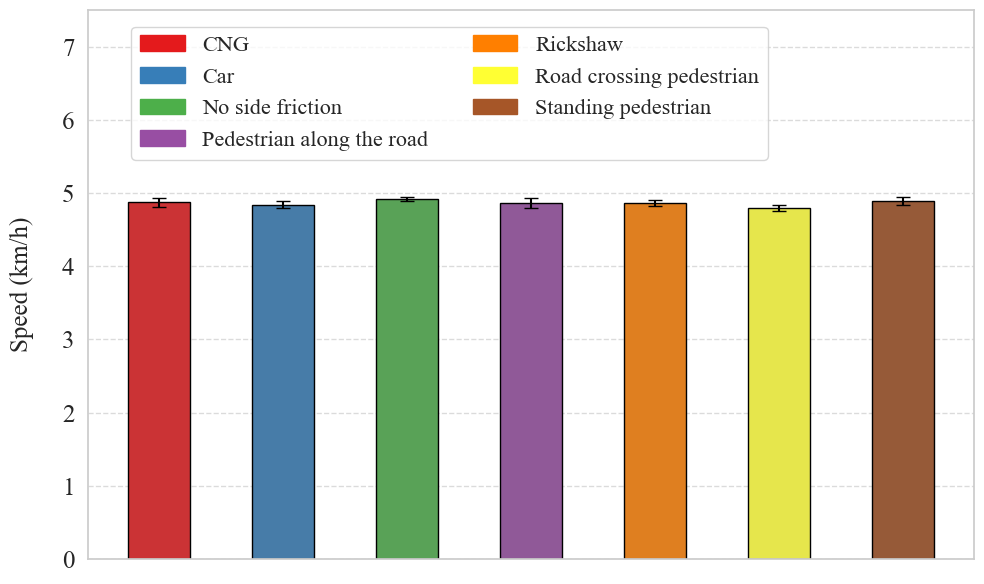

In [122]:
# Speed bar plot
sns.set_theme(style="whitegrid", font="Times New Roman")

# Define color palette
colors = sns.color_palette("Set1", n_colors=7)
color_map = dict(zip(["No side friction", "Rickshaw", "Car", "CNG", "Standing pedestrian", "Road crossing pedestrian", "Pedestrian along the road"], colors))


plt.figure(figsize=(10, 6))
sns.barplot(
    data=stats, 
    x='type', 
    y='speed_avg', 
    palette=colors, 
    capsize=0.2, 
    edgecolor='black',
    width=0.5
)
# Add error bars
plt.errorbar(
    x=range(len(stats['type'])), 
    y=stats['speed_avg'], 
    yerr=stats['speed_sd'], 
    fmt='none', 
    c='black', 
    capsize=5
)
# Add text labels
# for i, row in stats.iterrows():
#     plt.text(i, row['speed_avg'] / 2, f"{row['speed_avg']:.1f}", ha='center', fontsize=10)

# Customize the plot
plt.title("", fontsize=16)
plt.xlabel("", fontsize=18)
plt.ylabel("Speed (km/h)", fontsize=18, labelpad=20)
plt.ylim(0, 7.5)
plt.xticks([])
#plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend inside the plot as a 4x2 grid
legend_labels = stats['type']
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(legend_labels))]
plt.legend(
    handles, 
    legend_labels, 
    title=None, 
    loc='upper right', 
    bbox_to_anchor=(.78, 0.99),  # Adjust position
    frameon=True,
    fontsize=16, 
    ncol=2  # Set to 2 columns
)

plt.tight_layout()
plt.show()

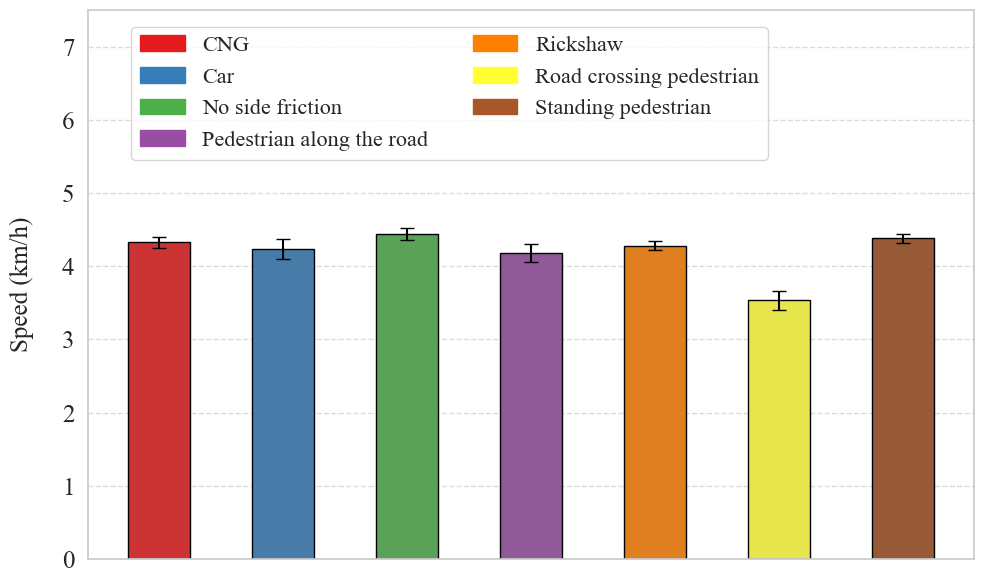

In [123]:
# same for stats_2
plt.figure(figsize=(10, 6))
sns.barplot(
    data=stats_2, 
    x='type', 
    y='speed_avg', 
    palette=colors, 
    capsize=0.2, 
    edgecolor='black',
    width=0.5
)

plt.errorbar(
    x=range(len(stats_2['type'])), 
    y=stats_2['speed_avg'], 
    yerr=stats_2['speed_sd'], 
    fmt='none', 
    c='black', 
    capsize=5
)

plt.title("", fontsize=16)
plt.xlabel("", fontsize=18)
plt.ylabel("Speed (km/h)", fontsize=18, labelpad=20)
plt.ylim(0, 7.5)
plt.xticks([])
plt.yticks(fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.7)

legend_labels = stats_2['type']
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(legend_labels))]
plt.legend(
    handles, 
    legend_labels, 
    title=None, 
    loc='upper right', 
    bbox_to_anchor=(.78, 0.99),  # Adjust position
    frameon=True,
    fontsize=16, 
    ncol=2  # Set to 2 columns
)

plt.tight_layout()
plt.show()


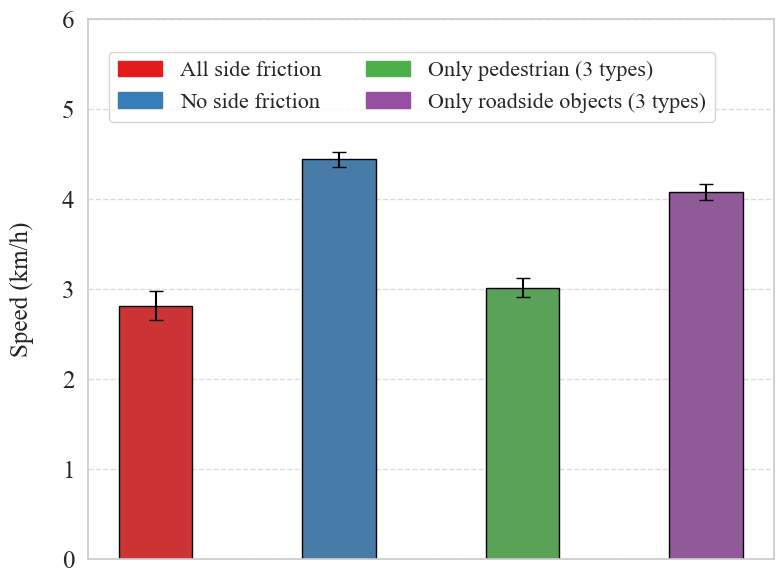

In [92]:
# for stats_3
plt.figure(figsize=(8, 6))
sns.barplot(
    data=stats_3, 
    x='type', 
    y='speed_avg', 
    palette=colors, 
    capsize=0.2, 
    edgecolor='black',
    width=0.4
)

plt.errorbar(
    x=range(len(stats_3['type'])), 
    y=stats_3['speed_avg'], 
    yerr=stats_3['speed_sd'], 
    fmt='none', 
    c='black', 
    capsize=5
)

plt.title("", fontsize=16)
plt.xlabel("", fontsize=18)
plt.ylabel("Speed (km/h)", fontsize=18, labelpad=20)
plt.ylim(0, 6)
plt.xticks([])
plt.yticks(fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.7)

legend_labels = stats_3['type']
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(legend_labels))]
plt.legend(
    handles, 
    legend_labels, 
    title=None, 
    loc='upper right', 
    bbox_to_anchor=(.93, 0.96),  # Adjust position
    frameon=True,
    fontsize=16, 
    ncol=2  # Set to 2 columns
)

plt.tight_layout()
plt.show()


## Grouped Plot

C:\Users\Osama Haque\AppData\Local\Temp\ipykernel_11172\1985828047.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


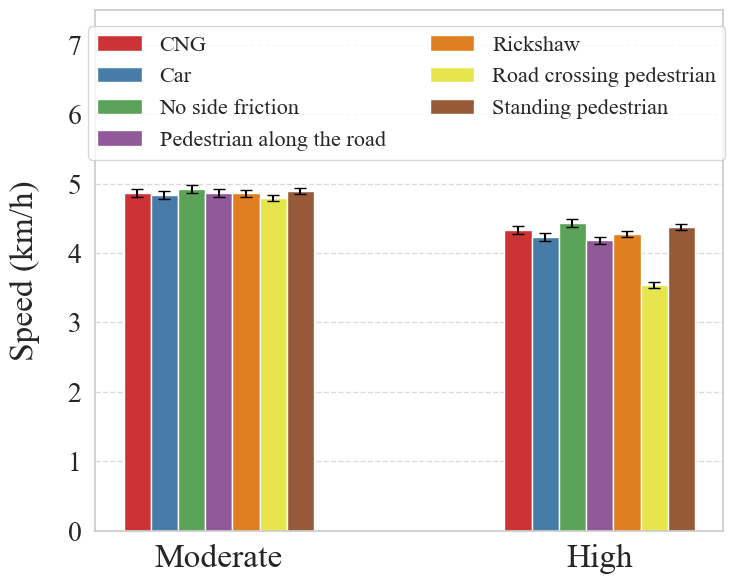

In [199]:
# single plot using merged_plot_data1
plt.figure(figsize=(7.5, 6))

barplot = sns.barplot(
    data=merged_plot_data1, x='Density', y='speed_avg', hue='type',
    palette='Set1', ci=None, dodge=True, width=0.5
)

# Add error bars
for i,bar in enumerate(barplot.patches):
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_y = bar.get_height()
    error = merged_plot_data1.loc[i // 7, 'speed_sd']
    #print(f"error shape: {error.shape} and error is: {error}")
    
    #print(f"bar_x: {bar_x}, bar_y: {bar_y}, error: {error}")
    plt.errorbar(bar_x, bar_y, yerr=error, fmt='none', capsize=4, c='black')
    
    
plt.title("", fontsize=16)
plt.xlabel("", fontsize=24)
plt.ylabel("Speed (km/h)", fontsize=24, labelpad=20)
plt.ylim(0, 7.5)

plt.xticks(fontsize=24)
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title=None, loc='upper right', bbox_to_anchor=(1.02, 0.99), frameon=True, fontsize=16, ncol=2)


plt.tight_layout()
plt.savefig('speed_plot_indv.pdf', bbox_inches='tight')
plt.show()


C:\Users\Osama Haque\AppData\Local\Temp\ipykernel_11172\2304920120.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


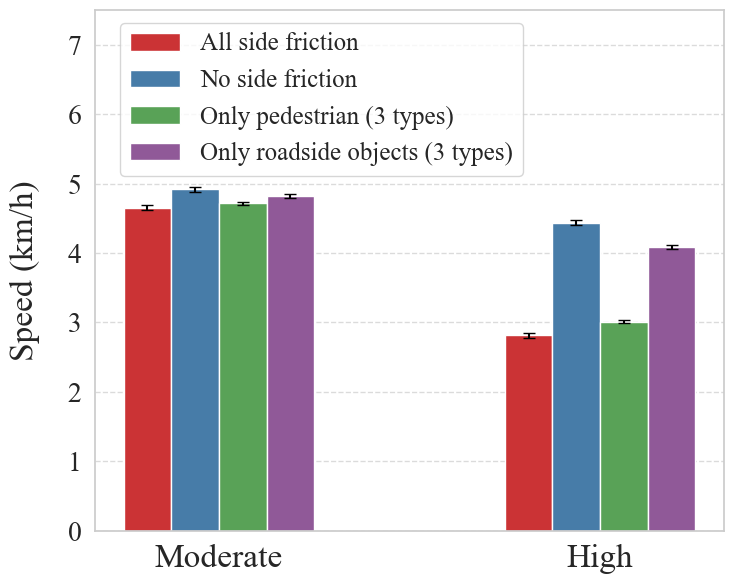

In [203]:
# same for merged_plot_data2
plt.figure(figsize=(7.5, 6))

barplot = sns.barplot(
    data=merged_plot_data2, x='Density', y='speed_avg', hue='type',
    palette='Set1', ci=None, dodge=True, width=0.5
)

# Add error bars

for i,bar in enumerate(barplot.patches):
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_y = bar.get_height()
    error = merged_plot_data2.loc[i // 4, 'speed_sd']
    plt.errorbar(bar_x, bar_y, yerr=error, fmt='none', capsize=4, c='black')
    
plt.title("", fontsize=16)
plt.xlabel("", fontsize=18)
plt.ylabel("Speed (km/h)", fontsize=24, labelpad=20)
plt.ylim(0, 7.5)

plt.xticks(fontsize=24)
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title=None, loc='upper right', bbox_to_anchor=(.7, 1), frameon=True, fontsize=18, ncol=1)


plt.tight_layout()
plt.savefig('speed_plot_batched.pdf', bbox_inches='tight')
plt.show()    

C:\Users\Osama Haque\AppData\Local\Temp\ipykernel_11172\581443745.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


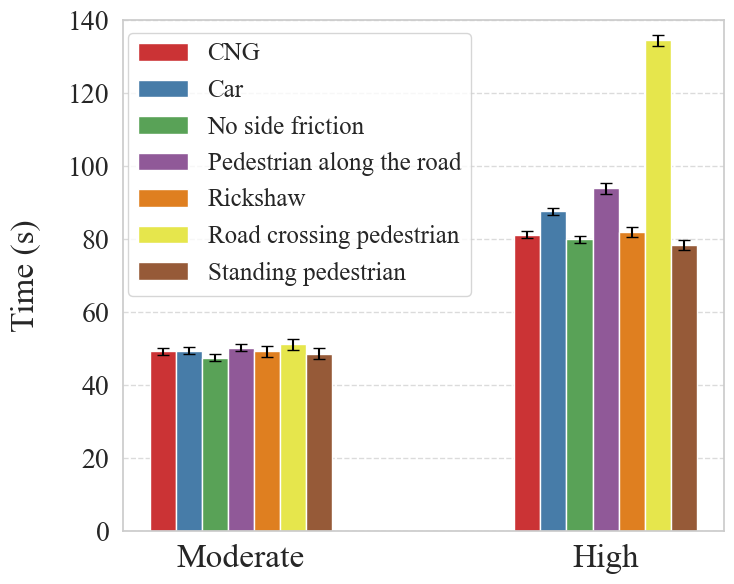

In [205]:
# same for time
plt.figure(figsize=(7.5, 6))
barplot = sns.barplot(
    data=merged_plot_data1, x='Density', y='time_avg', hue='type',
    palette='Set1', ci=None, dodge=True, width=0.5
)

# Add error bars
for i,bar in enumerate(barplot.patches):
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_y = bar.get_height()
    error = merged_plot_data1.loc[i // 7, 'time_sd']
    plt.errorbar(bar_x, bar_y, yerr=error, fmt='none', capsize=4, c='black')
    
plt.title("", fontsize=16)
plt.xlabel("", fontsize=18)
plt.ylabel("Time (s)", fontsize=24, labelpad=20)
plt.ylim(0, 140)

plt.xticks(fontsize=24)
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title=None, loc='upper right', bbox_to_anchor=(.6, 1), frameon=True, fontsize=18, ncol=1)

plt.tight_layout()
plt.savefig('time_plot_indv.pdf', bbox_inches='tight')
plt.show()


C:\Users\Osama Haque\AppData\Local\Temp\ipykernel_11172\2486345124.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


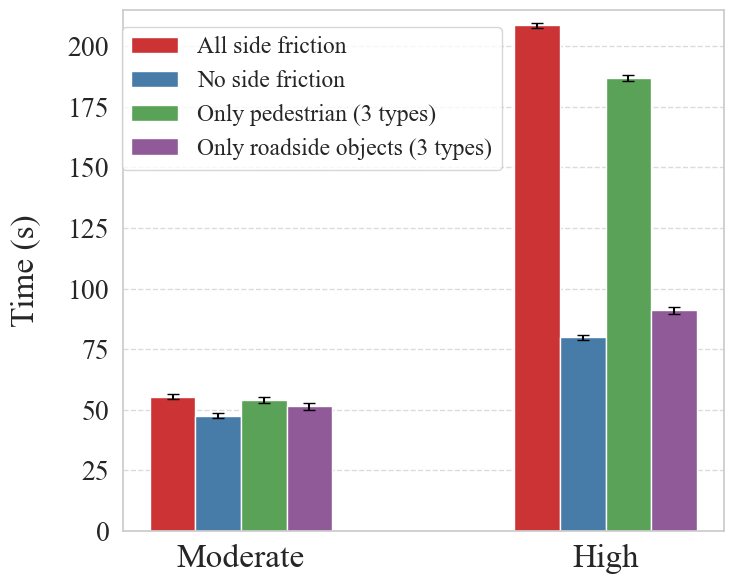

In [ ]:
# same for time
plt.figure(figsize=(7.5, 6))
barplot = sns.barplot(
    data=merged_plot_data2, x='Density', y='time_avg', hue='type',
    palette='Set1', ci=None, dodge=True, width=0.5
)

# Add error bars
for i,bar in enumerate(barplot.patches):
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_y = bar.get_height()
    error = merged_plot_data2.loc[i // 4, 'time_sd']
    plt.errorbar(bar_x, bar_y, yerr=error, fmt='none', capsize=4, c='black')
    
plt.title("", fontsize=16)
plt.xlabel("Vehicular density", fontsize=18)
plt.ylabel("Time (s)", fontsize=24, labelpad=20)
plt.ylim(0, 215)

plt.xticks(fontsize=24)
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title=None, loc='upper right', bbox_to_anchor=(0.65, 0.99), frameon=True, fontsize=17, ncol=1)

plt.tight_layout()
plt.savefig('time_plot_batched.pdf', bbox_inches='tight')
plt.show()